In [52]:
from sqw.tesselations import even_cycle_two_tesselation
from sqw.experiments import running
from sqw.states import uniform_initial_state, amp2prob
from sqw.statistics import states2mean, states2std, states2ipr, states2survival
from sqw.plots import final_distribution_plot, mean_plot, std_plot, ipr_plot, survival_plot
from sqw.utils import random_tesselation_order, random_angle_deviation, tesselation_choice

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import time

#### 1 – Uniform Angles and Uniform Tesselation

In [2]:
N = 100
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 20
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = [[0,1] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2 + 1])

states_ua_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

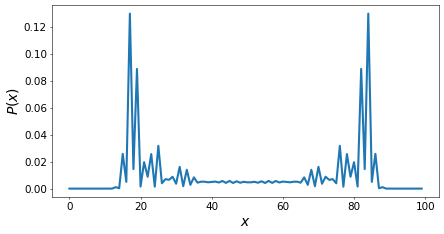

In [3]:
final_distribution_plot(amp2prob(states_ua_ut[steps]), list(range(N)))

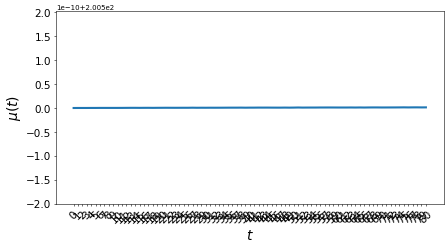

In [4]:
mean_plot(states2mean(states_ua_ut, range(0, N)), steps)

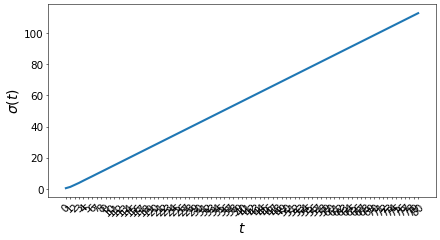

In [5]:
std_plot(states2std(states_ua_ut, range(0, N)), steps)

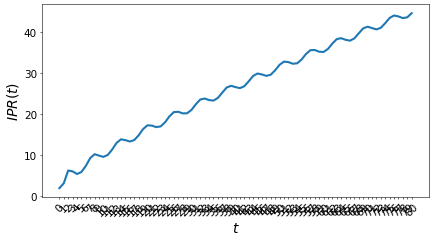

In [6]:
ipr_plot(states2ipr(states_ua_ut, range(0,N)), steps)

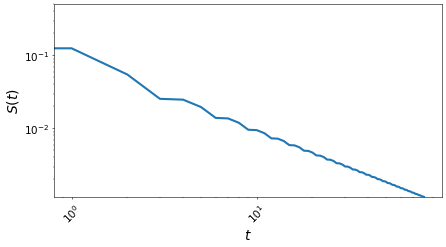

In [7]:
survival_plot(states2survival(states_ua_ut, N//2), steps)

#### 2 – Random Angles + Uniform Tesselation 

In [53]:
start = time.time()

N = 200
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 50
angles = random_angle_deviation([np.pi/3, np.pi/3], [.5, .5], steps)
tesselation_order = [[1,0] for x in range(steps)]
initial_state = uniform_initial_state(N, nodes = [N//2, N//2+1])

states_ra_ut = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

end = time.time()
print(end - start)

19.77138924598694


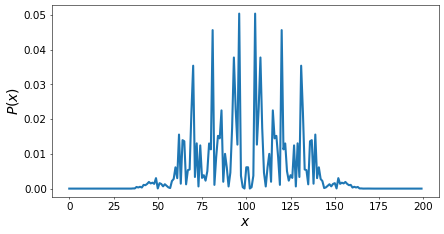

In [35]:
final_distribution_plot(amp2prob(states_ra_ut[steps-10]), list(range(N)))

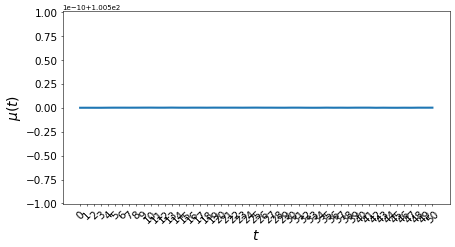

In [30]:
mean_plot(states2mean(states_ra_ut, range(N)), steps)

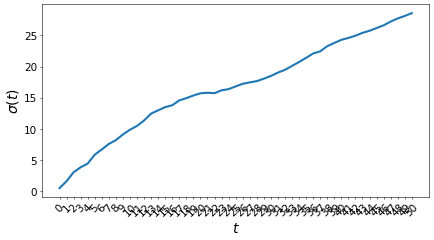

In [31]:
std_plot(states2std(states_ra_ut, range(0, N)), steps)

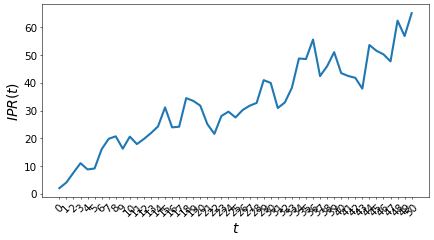

In [32]:
ipr_plot(states2ipr(states_ra_ut, range(0, N)), steps)

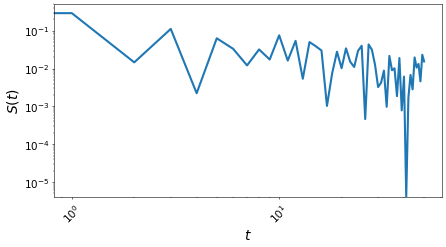

In [33]:
survival_plot(states2survival(states_ra_ut, N//2), steps)

#### 3 – Uniform Angles + Random Tesselations (Probs)

In [14]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = [[np.pi/3, np.pi/3]] * steps
tesselation_order = random_tesselation_order(2, steps, [.2, .8])
initial_state = uniform_initial_state(N, nodes = [N//2, N//2 + 2])

states_ua_rtp = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

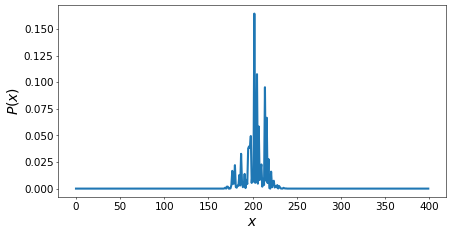

In [15]:
final_distribution_plot(amp2prob(states_ua_rtp[steps]), list(range(N)))

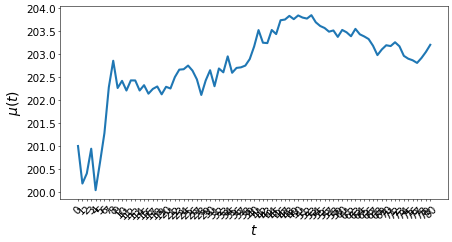

In [16]:
mean_plot(states2mean(states_ua_rtp, range(0, N)), steps)

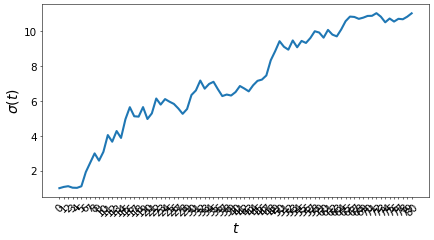

In [17]:
std_plot(states2std(states_ua_rtp, range(0, N)), steps)

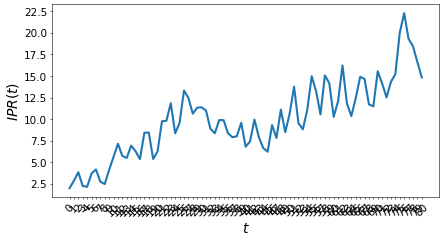

In [18]:
ipr_plot(states2ipr(states_ua_rtp, range(0, N)), steps)

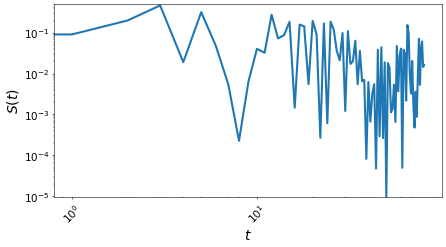

In [19]:
survival_plot(states2survival(states_ua_rtp, N//2), steps)

#### 4 – Uniform Angles + Random Tesselation Shift

In [20]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = [[np.pi/3, np.pi/3]] * steps
shift_prob = .1
tesselation_order = tesselation_choice([[0,1], [1,0]], steps, [1 - shift_prob, shift_prob])
initial_state = uniform_initial_state(N, nodes = [N//2, N//2 + 2])

states_ua_rts = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

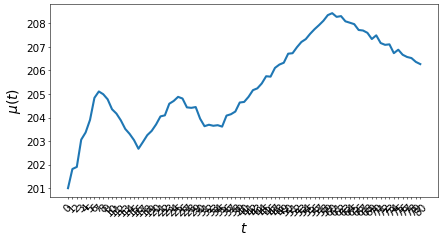

In [21]:
mean_plot(states2mean(states_ua_rts, range(0, N)), steps)

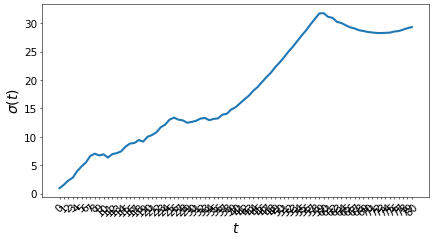

In [22]:
std_plot(states2std(states_ua_rts, range(0, N)), steps)

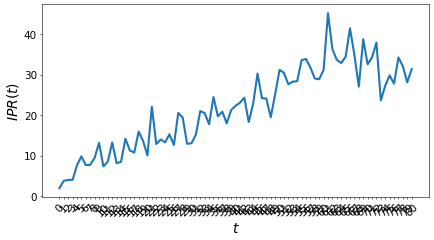

In [23]:
ipr_plot(states2ipr(states_ua_rts, range(0, N)), steps)

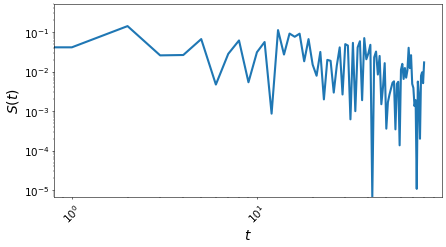

In [24]:
survival_plot(states2survival(states_ua_rts, N//2), steps)

#### 5 – Random Angles + Random Tesselation Shift

In [25]:
N = 400
T = even_cycle_two_tesselation(N)
G = nx.cycle_graph(N)

steps = 80
angles = random_angle_deviation([np.pi/3, np.pi/3], [.2, .2], steps)
shift_prob = .1
tesselation_order = tesselation_choice([[0,1], [1,0]], steps, [1 - shift_prob, shift_prob])
initial_state = uniform_initial_state(N, nodes = [N//2])

states_ra_rts = running(G, T, steps, 
                 initial_state, 
                 angles = angles, 
                 tesselation_order = tesselation_order)

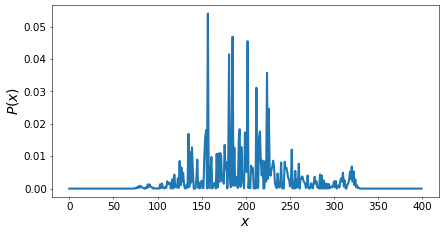

In [26]:
final_distribution_plot(amp2prob(states_ra_rts[steps]), list(range(N)))

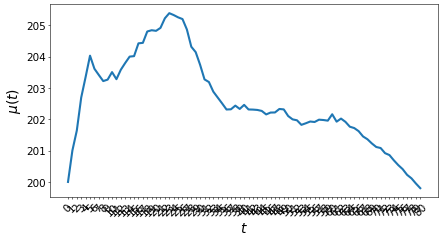

In [27]:
mean_plot(states2mean(states_ra_rts, range(N)), steps)

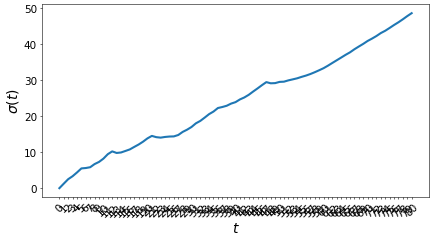

In [28]:
std_plot(states2std(states_ra_rts, range(0, N)), steps)

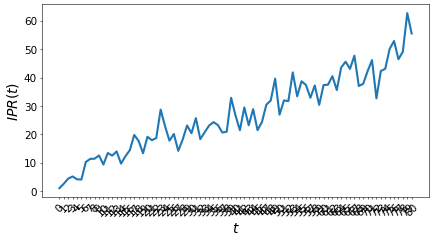

In [29]:
ipr_plot(states2ipr(states_ra_rts, range(0, N)), steps)

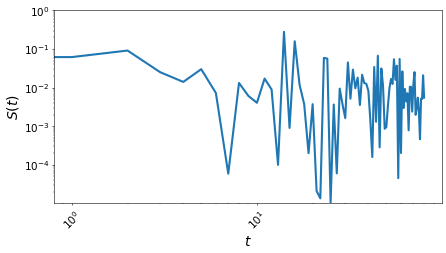

In [30]:
survival_plot(states2survival(states_ra_rts, N//2), steps)

In [2]:
v = np.array([0,0,0,1,1,0,0,0])

In [10]:
A = nx.adjacency_matrix(nx.cycle_graph(8)).todense()

In [23]:
v[0:3] = A[0:3, 0:3]@v[0::3]

In [41]:
D, V = np.linalg.eigh(A)
V = np.matrix(V)
D = np.diag(D)

In [45]:
A_eig = V @ D @ V.H